# Retail Sales Analysis
*Author: Luz Ramirez*  
This project analyzes retail sales data to identify trends, top products, and regional performance.  
The goal is to demonstrate data analysis, visualization, and business insight skills.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("retail_sales_clean.csv", parse_dates=["order_date"])
df['sales'] = df['quantity'] * df['unit_price']
df.head()

,order_id,order_date,customer_id,region,product_category,product_name,quantity,unit_price,payment_type,sales
0,2001,2023-04-13,18,East,Electronics,Laptop,2,191,Gift Card,382
1,2002,2023-12-15,40,North,Electronics,Laptop,4,478,PayPal,1912
2,2003,2023-09-28,1,West,Clothing,Jeans,3,407,Gift Card,1221
3,2004,2023-04-17,11,North,Home,Vacuum,4,232,PayPal,928
4,2005,2023-03-13,28,North,Sports,Yoga Mat,1,320,Gift Card,320


## Data Overview
The dataset contains retail transactions with:
- **Order date**
- **Customer ID**
- **Region**
- **Product category & product name**
- **Quantity and unit price**
- **Payment type**

A new column, **sales**, was created as `quantity × unit_price` to calculate total revenue per order.

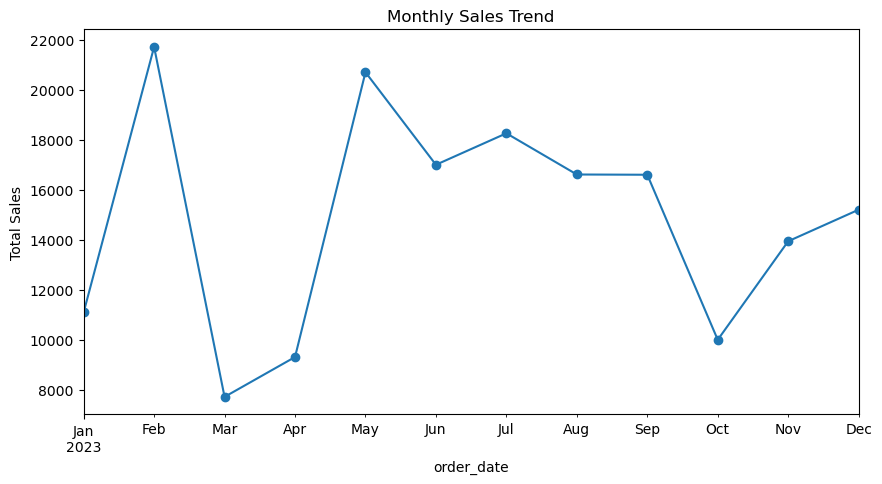

In [3]:
monthly_sales = df.groupby(df['order_date'].dt.to_period('M'))['sales'].sum()
monthly_sales.plot(kind="line", marker="o", figsize=(10,5), title="Monthly Sales Trend")
plt.ylabel("Total Sales")
plt.show()

## Monthly Sales Insights
- Sales peaked in **February** at ≈22,000, then dropped in March to ≈7,700.  
- Smaller peaks occurred in **May** and **July**.  
- December also showed an uptick, likely due to holiday shopping.  

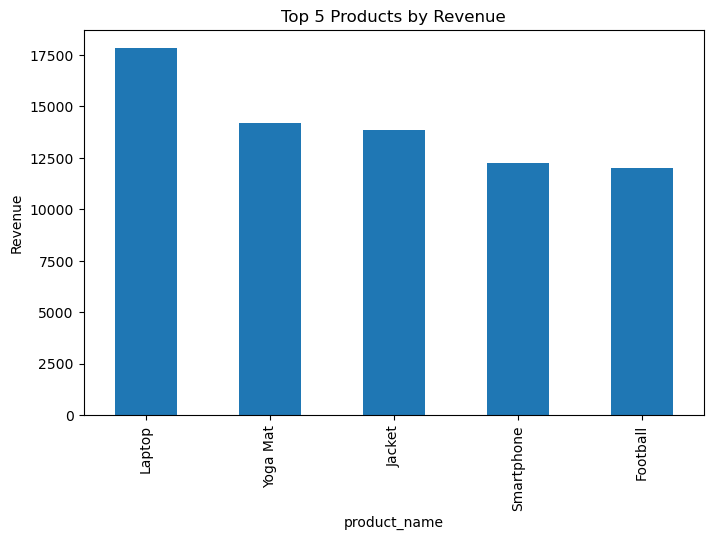

In [4]:
top_products = df.groupby('product_name')['sales'].sum().sort_values(ascending=False).head(5)
top_products.plot(kind="bar", figsize=(8,5), title="Top 5 Products by Revenue")
plt.ylabel("Revenue")
plt.show()

## Product Insights
- **Laptops** and **Yoga Mats** were the top revenue drivers.  
- High-performing products are spread across categories, showing diverse demand.  

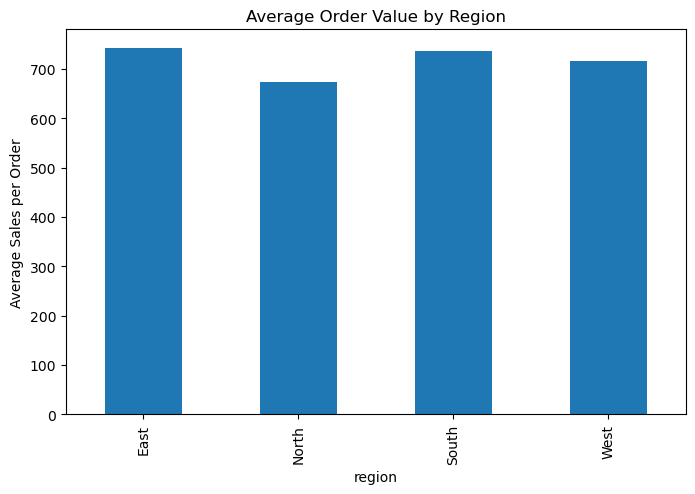

In [5]:
aov_region = df.groupby('region')['sales'].mean()
aov_region.plot(kind="bar", figsize=(8,5), title="Average Order Value by Region")
plt.ylabel("Average Sales per Order")
plt.show()

## Regional Insights
- **East region** had the highest average order value (≈740 per order).  
- **South** followed closely (≈735).  
- **North** was the lowest at ≈670.  

# Final Business Insights
- Sales showed seasonality, peaking in February and December.  
- Laptops and Yoga Mats are strong revenue contributors.  
- East region customers spend the most on average, while North spends the least.  

📊 This analysis could guide:
- Inventory planning (stock more top products).  
- Marketing campaigns (focus promotions around seasonal peaks).  
- Regional strategies (target East for premium products, North for growth).  